<a href="https://colab.research.google.com/github/Aswinibishoyi/3.Data-Preprocessing/blob/master/Statistical_Imputation_of_missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Common statistics for missing data imputation
1. The mean Value
2. The Median
3. The Mlde value
4. A constant

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


%%upload from local drive%%

In [6]:
from google.colab import files
uploaded = files.upload()

From Google Drive via PyDrive

In [0]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
fluff, id = link.split('=')print (id) # Verify that you have everything after '='

SyntaxError: ignored

In [0]:
import pandas as pd

In [0]:
path = "/content/drive/My Drive/Colab Notebooks/horse-colic.csv"

dataframe = pd.read_csv(path,header=None, na_values='?')


In [20]:
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,NaN,NaN,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,2.0,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,5.0,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,4.0,3.0,3.0,3.0,1.0,NaN,4.0,4.0,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,2.0,1.0,NaN,3.0,5.0,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,1.0,NaN,4.0,4.0,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [21]:
# summarize the first few rows
print(dataframe.head())

    0   1        2     3      4     5    6   ...   21   22  23     24  25  26  27
0  2.0   1   530101  38.5   66.0  28.0  3.0  ...  NaN  2.0   2  11300   0   0   2
1  1.0   1   534817  39.2   88.0  20.0  NaN  ...  2.0  3.0   2   2208   0   0   2
2  2.0   1   530334  38.3   40.0  24.0  1.0  ...  NaN  1.0   2      0   0   0   1
3  1.0   9  5290409  39.1  164.0  84.0  4.0  ...  5.3  2.0   1   2208   0   0   1
4  2.0   1   530255  37.3  104.0  35.0  NaN  ...  NaN  2.0   2   4300   0   0   2

[5 rows x 28 columns]


In [22]:
...
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
	# count number of rows with missing values
	n_miss = dataframe[[i]].isnull().sum()
	perc = n_miss / dataframe.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, Missing: 55 (18.3%)
> 11, Missing: 44 (14.7%)
> 12, Missing: 56 (18.7%)
> 13, Missing: 104 (34.7%)
> 14, Missing: 106 (35.3%)
> 15, Missing: 247 (82.3%)
> 16, Missing: 102 (34.0%)
> 17, Missing: 118 (39.3%)
> 18, Missing: 29 (9.7%)
> 19, Missing: 33 (11.0%)
> 20, Missing: 165 (55.0%)
> 21, Missing: 198 (66.0%)
> 22, Missing: 1 (0.3%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)


Statistical Imputation With SimpleImputer

In [25]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = SimpleImputer(strategy='mean')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


SimpleImputer and Model Evaluation

In [26]:
# evaluate mean imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.847 (0.056)


Comparing Different Imputed Statistics

>mean 0.840 (0.053)
>median 0.832 (0.053)
>most_frequent 0.838 (0.055)
>constant 0.874 (0.041)


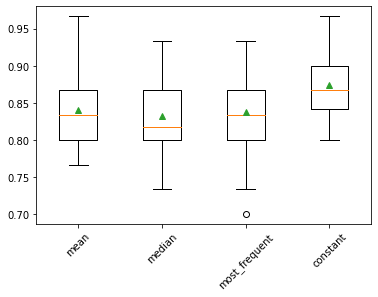

In [27]:
# compare statistical imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

SimpleImputer Transform When Making a Prediction

In [28]:
# constant imputation strategy and prediction for the hose colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2,1,530101,38.50,66,28,3,3,nan,2,5,4,4,nan,nan,nan,3,5,45.00,8.40,nan,nan,2,2,11300,00000,00000]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


Further Readings


    Bad Data Handbook, 2012.
    Data Mining: Practical Machine Learning Tools and Techniques, 2016.
    Applied Predictive Modeling, 2013.
